In [92]:
import numpy as np
import steepest_gradient_descent
import newton
from matplotlib import pyplot as plt

## 問題設定
適当な$\mathbb{R}^{2\times 2}$半正定値行列を作り二次凸計画問題を考える(連立線形方程式)

In [93]:
np.random.seed(10)
n_size = 2
A = np.random.random((n_size, n_size))
A = A.T @ A
x0 = np.array([1,1])

def f(x):
    return x@A@x
def df(x):
    return A@x
def ddf(x):
    return A

## 最急降下法
(ToDo 直線探索)

In [115]:
optimizer = steepest_gradient_descent.Optimizer(f, df)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  4.1279848146766845e-12
optimal solution :  [-2.25069879e-06  3.46110070e-06]
num iterated :  46120


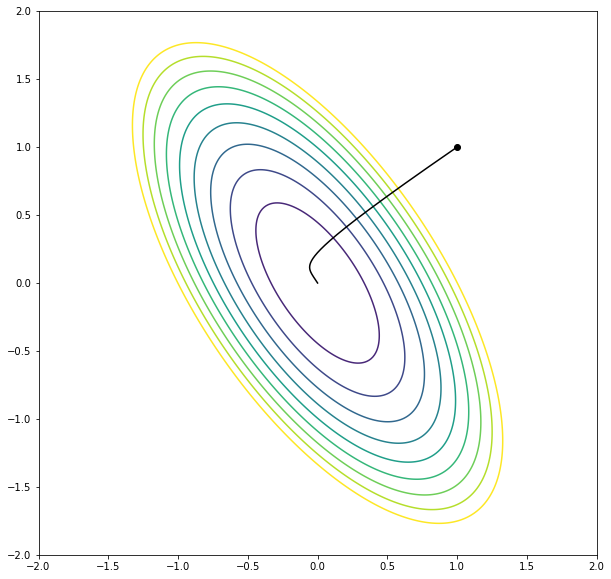

In [119]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(0,1,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

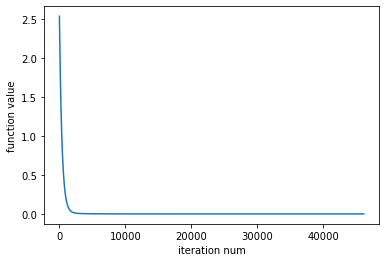

In [117]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)

## ニュートン法
暫定解周りで二次近似して最小値に更新するので一回の更新で最適値に到達

In [109]:
optimizer = newton.Optimizer(f, df, ddf)
optimizer.optimize(x0)
opt_val = optimizer.opt_val
opt_sol = optimizer.opt_sol
path = optimizer.path
print('optimal value : ',opt_val)
print('optimal solution : ', opt_sol)
print("num iterated : ", len(path))

optimal value :  0.0
optimal solution :  [0. 0.]
num iterated :  2


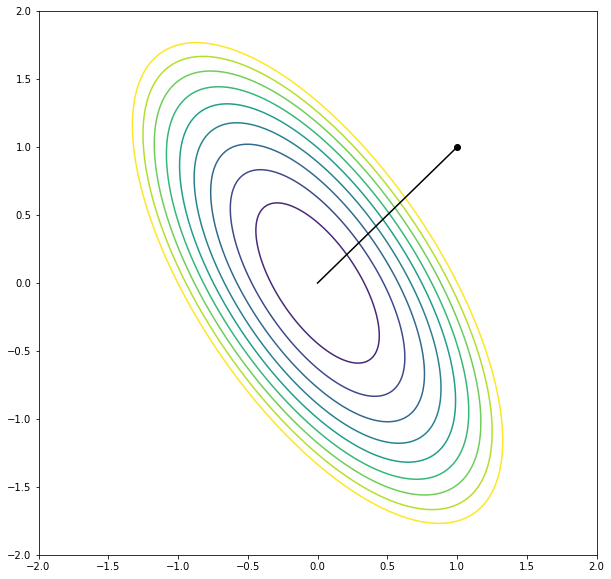

In [110]:
plt.figure(figsize = (10,10))
plt.scatter(x0[0],x0[1], color='k', marker='o')
plt.plot(path[:,0], path[:,1], color='k', linewidth=1.5)
grid_width = 300
xs = np.linspace(-2,2,grid_width)
ys = np.linspace(-2,2,grid_width)
xmesh, ymesh = np.meshgrid(xs, ys)
f_val = []
for i in range(grid_width):
    for j in range(grid_width):
        x_temp = np.array([xs[j], ys[i]])
        f_val.append(f(x_temp))        
f_val = np.array(f_val)        
levels = np.linspace(0,1,10)
plt.contour(xs, ys, f_val.reshape(xmesh.shape), levels = levels)

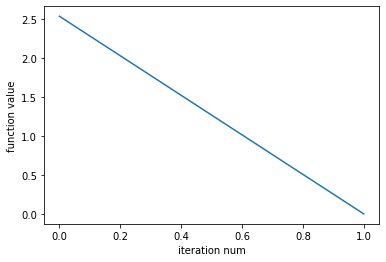

In [112]:
objective_val = []
for temp_sol in path:
    objective_val.append(f(temp_sol))
plt.xlabel('iteration num')
plt.ylabel('function value')
plt.plot(objective_val)